In [1]:
!pip3 install sklearn

You are using pip version 8.1.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from pyspark.sql import SparkSession

In [3]:
sparkSession = SparkSession.builder.appName("csv").getOrCreate()

In [4]:
df_load = sparkSession.read.csv('Iris.csv',header=True,inferSchema=True)
df_load.show(10)

+---+-------------+------------+-------------+------------+-----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|
+---+-------------+------------+-------------+------------+-----------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|
|  6|          5.4|         3.9|          1.7|         0.4|Iris-setosa|
|  7|          4.6|         3.4|          1.4|         0.3|Iris-setosa|
|  8|          5.0|         3.4|          1.5|         0.2|Iris-setosa|
|  9|          4.4|         2.9|          1.4|         0.2|Iris-setosa|
| 10|          4.9|         3.1|          1.5|         0.1|Iris-setosa|
+---+-------------+------------+-------------+------------+-----

In [5]:
df_load

DataFrame[Id: int, SepalLengthCm: double, SepalWidthCm: double, PetalLengthCm: double, PetalWidthCm: double, Species: string]

In [6]:
from pyspark.ml.feature import VectorAssembler
vecAssembler = VectorAssembler(inputCols=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'], outputCol='features')
stream_df = vecAssembler.transform(df_load)

In [7]:
stream_df.show(10)

+---+-------------+------------+-------------+------------+-----------+-----------------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|         features|
+---+-------------+------------+-------------+------------+-----------+-----------------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|[4.6,3.1,1.5,0.2]|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|[5.0,3.6,1.4,0.2]|
|  6|          5.4|         3.9|          1.7|         0.4|Iris-setosa|[5.4,3.9,1.7,0.4]|
|  7|          4.6|         3.4|          1.4|         0.3|Iris-setosa|[4.6,3.4,1.4,0.3]|
|  8|          5.0|         3.4|          1.5|         0.2|Iris-setosa|[5.0,3.4,1.5,0.2]|
|  9|     

In [8]:
from pyspark.ml.feature import PCA

In [9]:
pca = PCA(k=2, inputCol="features", outputCol="pca_features")
model = pca.fit(stream_df)
stream_df = model.transform(stream_df)
stream_df.show()

+---+-------------+------------+-------------+------------+-----------+-----------------+--------------------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|         features|        pca_features|
+---+-------------+------------+-------------+------------+-----------+-----------------+--------------------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|[-2.8271359726790...|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|[-2.7959524821488...|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|[-2.6215235581650...|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|[4.6,3.1,1.5,0.2]|[-2.7649059004742...|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|[5.0,3.6,1.4,0.2]|[-2.7827501159516...|
|  6|          5.4|         3.9|          1.7|         0.4|Iris-setosa|[5.4,3.9,1.7,0.4]|[-3.2314457367733...|
|

In [10]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

pandas_df = stream_df.select(['Species','pca_features']).toPandas()
series = pandas_df['pca_features'].apply(lambda x : np.array(x.toArray()))
pca_features = np.array(series.tolist())
classes = LabelEncoder().fit_transform(pandas_df['Species'])

In [14]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()

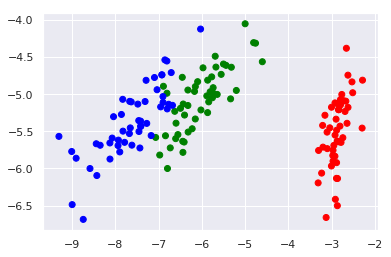

In [15]:
plt.scatter(pca_features[:,0],pca_features[:,1],
            c=classes,cmap=matplotlib.colors.ListedColormap(['red','green','blue']))
plt.show()